<a href="https://colab.research.google.com/github/eyalbh8/Assess-Loan-Repayment-Abillity/blob/main/Flower_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv("/content/drive/MyDrive/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/DATA/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris.drop("species", axis=1)
y = iris['species']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [6]:
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [7]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(4, activation='relu', input_shape=[4,]))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=10)

In [11]:
len(X_train) #Need a large amount of epochs to train

120

In [12]:
model.fit(scaled_X_train,y_train, epochs=600, validation_data=(scaled_X_test,y_test), callbacks=[early_stop])

Epoch 1/600
4/4 [==============================] - 1s 75ms/step - loss: 1.1110 - accuracy: 0.3583 - val_loss: 1.0957 - val_accuracy: 0.4333
Epoch 2/600
4/4 [==============================] - 0s 10ms/step - loss: 1.1086 - accuracy: 0.3500 - val_loss: 1.0944 - val_accuracy: 0.4667
Epoch 3/600
4/4 [==============================] - 0s 11ms/step - loss: 1.1058 - accuracy: 0.3500 - val_loss: 1.0930 - val_accuracy: 0.4667
Epoch 4/600
4/4 [==============================] - 0s 10ms/step - loss: 1.1031 - accuracy: 0.3500 - val_loss: 1.0917 - val_accuracy: 0.5000
Epoch 5/600
4/4 [==============================] - 0s 11ms/step - loss: 1.1007 - accuracy: 0.3500 - val_loss: 1.0904 - val_accuracy: 0.5000
Epoch 6/600
4/4 [==============================] - 0s 10ms/step - loss: 1.0981 - accuracy: 0.3500 - val_loss: 1.0890 - val_accuracy: 0.5000
Epoch 7/600
4/4 [==============================] - 0s 12ms/step - loss: 1.0956 - accuracy: 0.3667 - val_loss: 1.0877 - val_accuracy: 0.5000
Epoch 8/600
4/4 [===

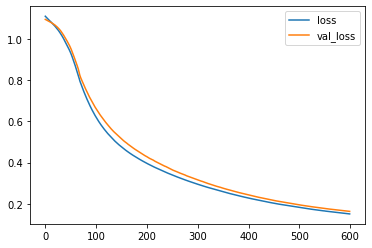

In [13]:
metrices = pd.DataFrame(model.history.history)
metrices[['loss', 'val_loss']].plot()

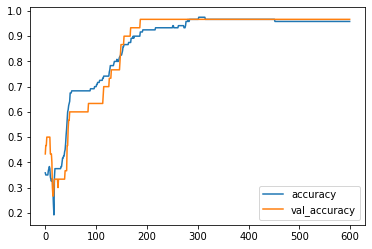

In [14]:
metrices[['accuracy', 'val_accuracy']].plot()

In [15]:
model.evaluate(scaled_X_test,y_test,verbose=0) #96% accuracy

[0.16321049630641937, 0.9666666388511658]

In [18]:
model.save('iris_model.h5')

In [19]:
import joblib
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

In [20]:
from tensorflow.keras.models import load_model

flower_model = load_model('iris_model.h5')

flower_scaler = joblib.load('iris_scaler.pkl')

In [21]:
flower_sample = {
    'sepal_length': 5.1,
    'sepal_width': 3.5,
    'petal_length': 1.4,
    'petal_width': 0.2
}

In [22]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
def flower_prediction(model, scaler, sample_json):

  sepal_length = sample_json['sepal_length']
  sepal_width = sample_json['sepal_width']
  petal_length = sample_json['petal_length']
  petal_width = sample_json['petal_width']

  flower = [[sepal_length, sepal_width, petal_length, petal_width]]
  flower = scaler.transform(flower)

  classes = np.array(['setosa', 'versicolor', 'virginica'])

  class_index = model.predict(flower)
  class_index = int(np.argmax(class_index))

  return classes[class_index]

In [24]:
flower_prediction(flower_model, flower_scaler, flower_sample)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


'setosa'